In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


# **1. Dataset Description and Problem Definition**

*A data frame with 53940 rows and 10 variables:*
1. price: price in US dollars ($326 -- 18,823$)
3. carat: weight of the diamond (0.2--5.01)
4. cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
5. color: diamond colour, from J (worst) to D (best)
6. clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
7. x: length in mm (0--10.74)
8. y: width in mm (0--58.9)
9. z: depth in mm (0--31.8)
10. depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
11. table: width of top of diamond relative to widest point (43--95)

> **predict the price of diamonds** using Linear Regression, Ridge, Lasso, and ElasticNet techniques  

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# EDA

In [3]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Descriptive statistics for numerical features. 
df[numeric_features].describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [4]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

<Axes: >

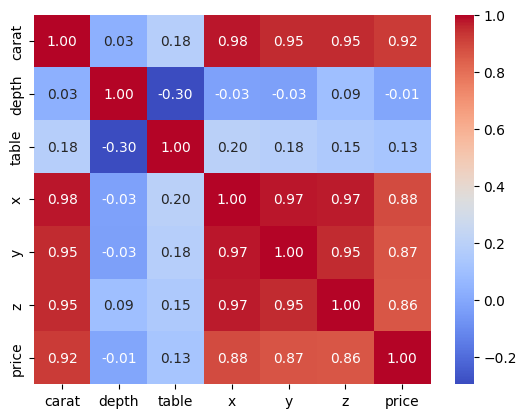

In [5]:
import seaborn as sns
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [6]:
print("strong positive correlations:")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if corr.iloc[i, j] > 0.8:
            print(f"{corr.columns[i]} and {corr.columns[j]}: {corr.iloc[i, j]:.2f}")

strong positive correlations:
carat and x: 0.98
carat and y: 0.95
carat and z: 0.95
carat and price: 0.92
x and y: 0.97
x and z: 0.97
x and price: 0.88
y and z: 0.95
y and price: 0.87
z and price: 0.86


In [7]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

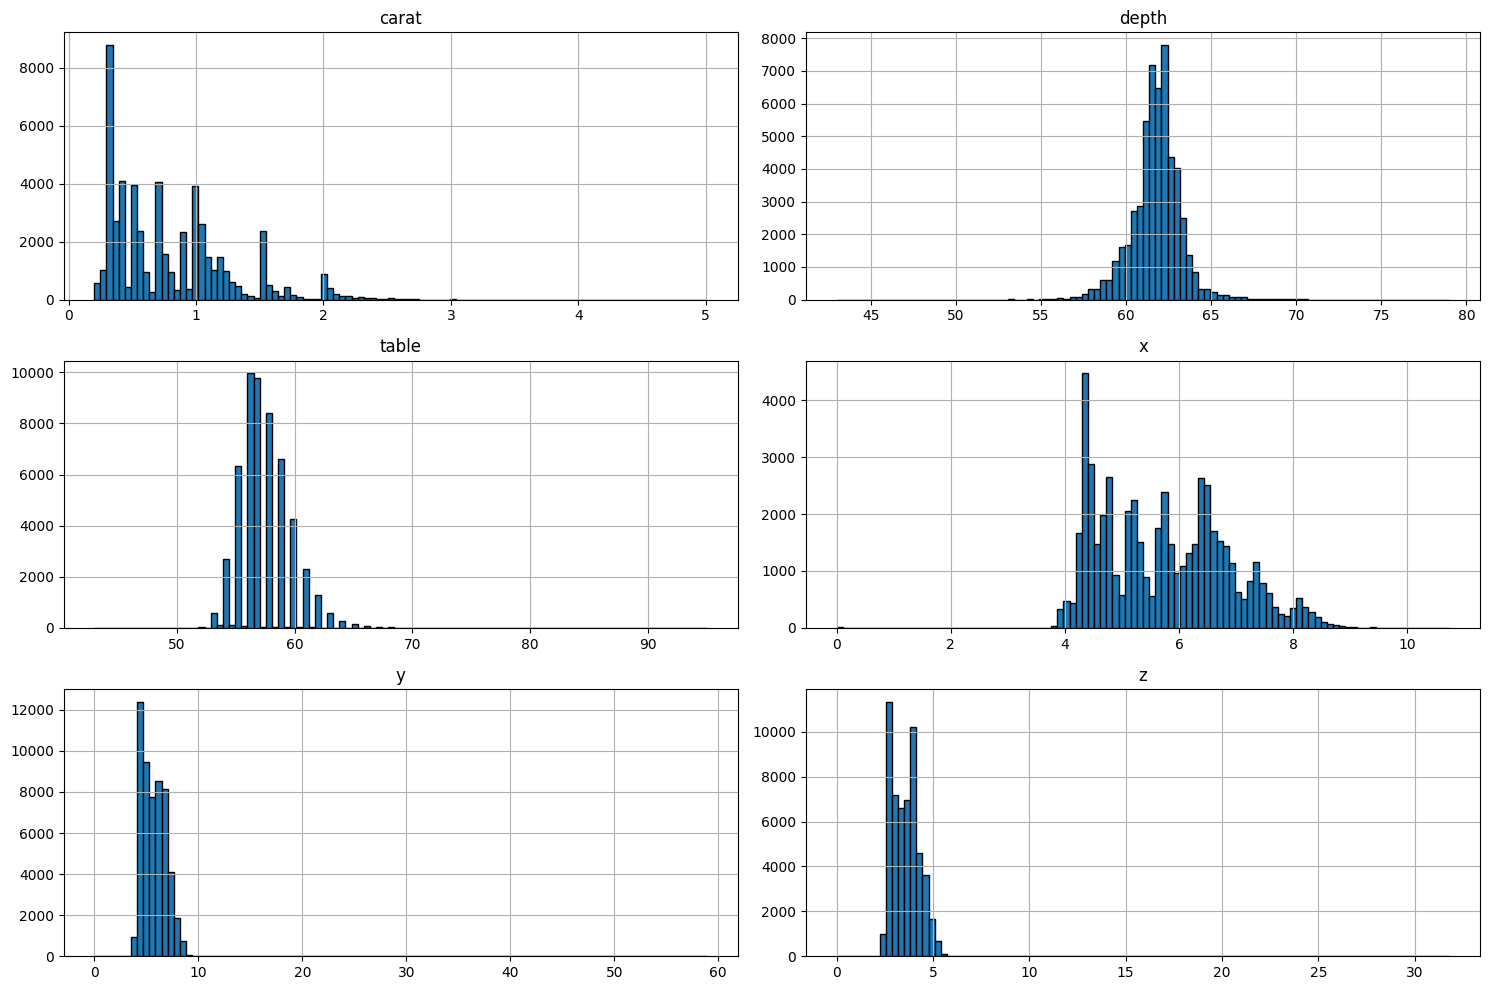

In [8]:
# Plot histograms for all numerical features
import matplotlib.pyplot as plt
df[numeric_features].hist(bins=100, figsize=(15, 10), edgecolor='black')
plt.tight_layout()

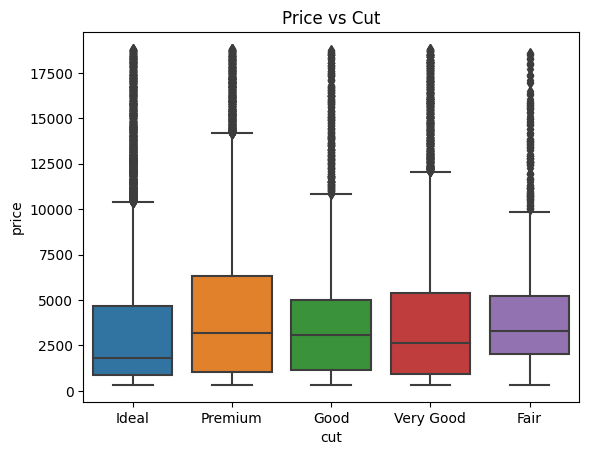

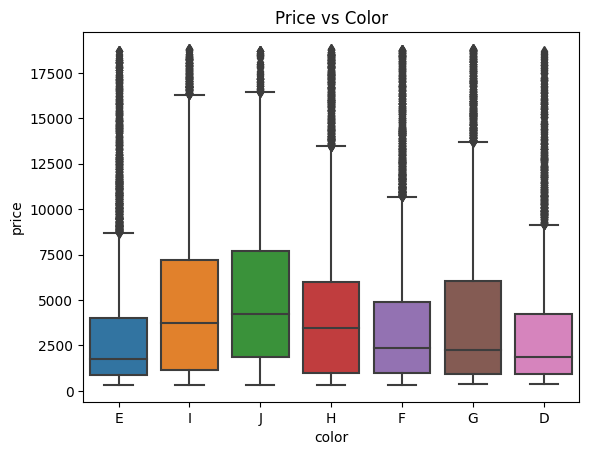

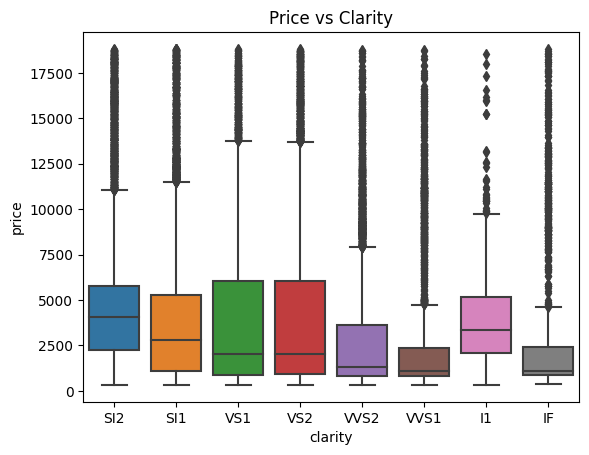

In [9]:
sns.boxplot(x='cut', y='price', data=df)
plt.title("Price vs Cut")
plt.show()

sns.boxplot(x='color', y='price', data=df)
plt.title("Price vs Color")
plt.show()


sns.boxplot(x='clarity', y='price', data=df)
plt.title("Price vs Clarity")
plt.show()

# Data Cleaning 

In [10]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(53940, 11)

In [13]:
# Filter df to remove outliers from numeric features
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

print("Data shape after removing outliers:" , df.shape )

Data shape after removing outliers: (48898, 11)


# Preprocessing 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
X = df.drop(['price', 'Unnamed: 0'], axis=1)
y = df['price']

In [16]:
preprosses = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
    ('categorical', OneHotEncoder(), categorical_features)])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling and Evaluation 

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
 
# Model 1: Linear Regression (no regularization)
model_no_reg = make_pipeline(preprosses, LinearRegression())
model_no_reg.fit(X_train, y_train)

# Model 2: Ridge Regression (L2)
model_ridge = make_pipeline(preprosses, Ridge(alpha=1.0))  
model_ridge.fit(X_train, y_train)

# Model 3: Lasso Regression (L1)
model_lasso = make_pipeline(preprosses, Lasso(alpha=1.0))
model_lasso.fit(X_train, y_train)

# Model 4: Elastic Net (L1 + L2)
model_elastic = make_pipeline(preprosses, ElasticNet(alpha=1.0, l1_ratio=0.5))  
model_elastic.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('elasticnet', ElasticNet())])

In [21]:
# # Get the fitted preprocessor
# fitted_preprocessor = model_no_reg.named_steps['columntransformer']
# feature_names = fitted_preprocessor.get_feature_names_out()

# # Collect coefficients
# coefs = {
#     "Linear": model_no_reg.named_steps['linearregression'].coef_,
#     "Ridge": model_ridge.named_steps['ridge'].coef_,
#     "Lasso": model_lasso.named_steps['lasso'].coef_,
#     "ElasticNet": model_elastic.named_steps['elasticnet'].coef_,
# }

# # Build the DataFrame with proper feature names
# df_coefs = pd.DataFrame(coefs, index=feature_names)
# df_coefs = df_coefs.sort_values(by='Lasso', ascending=False)
# df_coefs

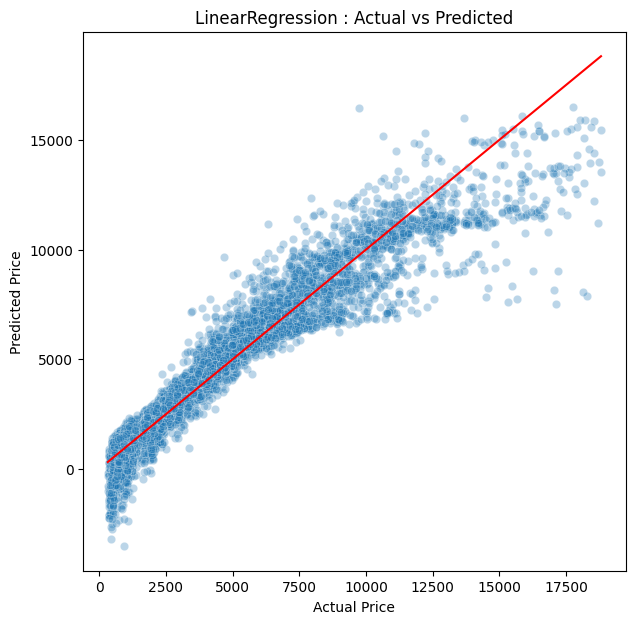

LinearRegression Results:
  MSE: 947416.0857
  RMSE: 973.3530
  R²: 0.9186
  Adjusted R²: 0.9185\n


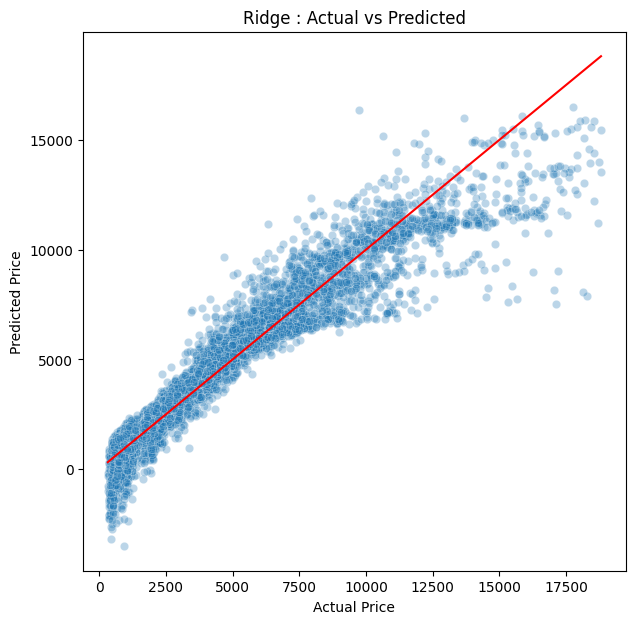

Ridge Results:
  MSE: 947386.2943
  RMSE: 973.3377
  R²: 0.9186
  Adjusted R²: 0.9185\n


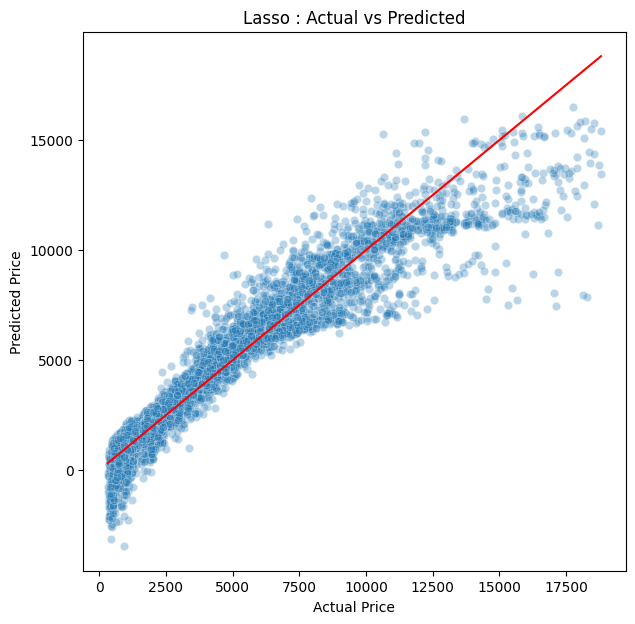

Lasso Results:
  MSE: 947743.4223
  RMSE: 973.5211
  R²: 0.9185
  Adjusted R²: 0.9185\n


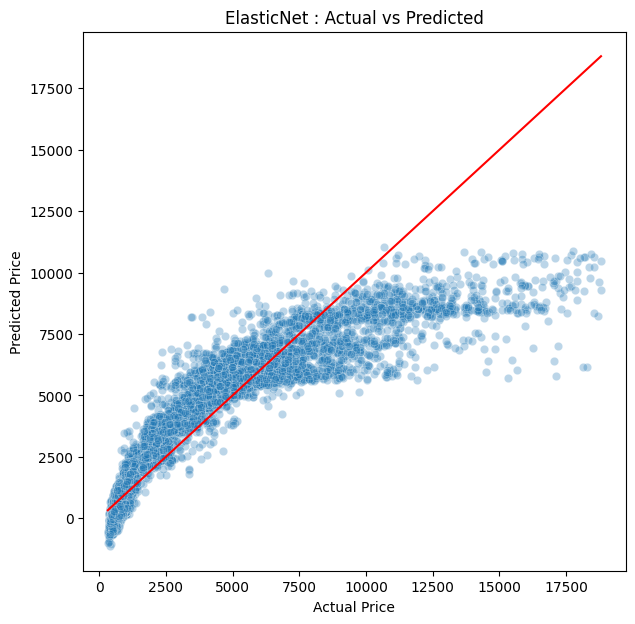

ElasticNet Results:
  MSE: 2322096.2220
  RMSE: 1523.8426
  R²: 0.8004
  Adjusted R²: 0.8002\n


In [23]:
from sklearn.pipeline import Pipeline

models = {
    'LinearRegression': model_no_reg,
    'Ridge': model_ridge,
    'Lasso': model_lasso,
    'ElasticNet': model_elastic
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(7,7))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name} : Actual vs Predicted")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.show()
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R²': r2, 'Adj R²': adj_r2}
    
    print(f"{name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Adjusted R²: {adj_r2:.4f}\\n")

In [26]:
feature_names = model_lasso.named_steps['columntransformer'].get_feature_names_out()

# Get Lasso coefficients
lasso_coefs = model_lasso.named_steps['lasso'].coef_

# Find zeroed-out features
lasso_zeroed = [name for name, coef in zip(feature_names, lasso_coefs) if coef == 0]

print("Lasso zeroed out features:")
for i in lasso_zeroed:
    print(i)

Lasso zeroed out features:
numeric__y
categorical__cut_Very Good
categorical__color_G


**there is high correlations between some features so for Linear Regression this might cause multicollinearity issues**

**ridge model performed best**